In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import pearsonr
import numpy as np
%matplotlib inline

In [3]:
df = pd.read_csv('../datasets/seeds.csv', header=None)

In [4]:
df.head()

,0,1,2,3,4,5,6,7
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


這個dataset 是穀物的資料，其中column 3 and column 4 分別是穀物的長與寬

練習一: 請取出這兩個feature並計算其pearson correlation

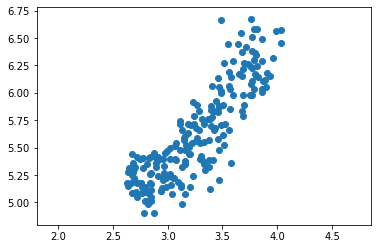

0.8604149377143466


In [5]:
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# 寬度
width = df.iloc[:, 4].values

# 長度
length = df.iloc[:, 3].values

# 畫出scatter plot, width vs length
plt.scatter(width, length)
plt.axis('equal')
plt.show()

# 算出 Pearson correlation
correlation, pvalue = pearsonr(width, length)

# Display the correlation
print(correlation)


練習2: 請利用pca 將上述長與寬兩個feature 進行轉換以去除其correlation, 並顯示其轉換後的correlation

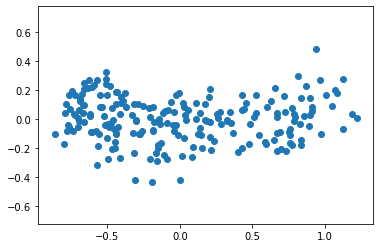

1.3877787807814457e-17


In [6]:
# Import PCA
from sklearn.decomposition import PCA

# Create PCA instance: model
model = PCA()
grains = df.iloc[:, [3, 4]]
# Apply the fit_transform method of model to grains: pca_features
pca_features = model.fit_transform(grains)

# Assign 0th column of pca_features: xs
xs = pca_features[:, 0]

# Assign 1st column of pca_features: ys
ys = pca_features[:, 1]

# Scatter plot xs vs ys
plt.scatter(xs, ys)
plt.axis('equal')
plt.show()

# Calculate the Pearson correlation of xs and ys
correlation, pvalue = pearsonr(xs, ys)

# Display the correlation
print(correlation)

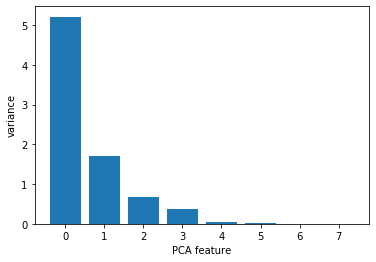

In [12]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

samples = df.values
# 先對資料進行標準化, 宣告一個名為scaler的StandardScaler
scaler = StandardScaler()

# 宣告一個名為 pca的PCA
pca = PCA()

# 以make_pipeline將前述兩個模型依序串一起
pipeline = make_pipeline(scaler, pca)

# 將模型fit資料
pipeline.fit(samples)

# 將各feature 的explained_variance_ 畫出
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

In [7]:
data = df.values
pca = PCA(n_components=2)
data_proj = pca.fit_transform(data)
print(pca.explained_variance_)
print(pca.components_)

[10.88832599  2.33107101]
[[ 0.87958263  0.39315205  0.00434851  0.12761234  0.11073223 -0.13345665
   0.12704993 -0.09616679]
 [ 0.12611602  0.06887441 -0.00319106  0.03593197  0.00308242  0.93113427
   0.09493436  0.31940056]]


In [8]:
data.shape

(210, 8)

In [9]:
grains = np.zeros((data.shape[0], 2))

In [10]:
grains[:, 0] = width
grains[:, 1] = length

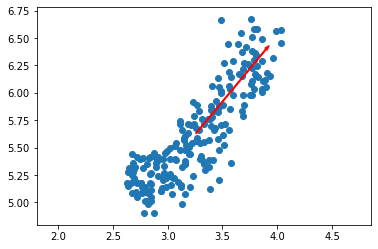

In [11]:
# 畫出width 與 length的散佈圖
plt.scatter(grains[:, 0], grains[:, 1])

# Create a PCA instance: model
model = PCA()

# Fit model to points
model.fit(grains)

# Get the mean of the grain samples: mean
mean = model.mean_

# Get the first principal component: first_pc
first_pc = model.components_[0, :]

# Plot first_pc as an arrow, starting at mean
plt.arrow(mean[0], mean[1], first_pc[0], first_pc[1], color='red', width=0.01)

# Keep axes on same scale
plt.axis('equal')
plt.show()